# Connecting and requesting data from ERDDAP tabledap datasets

We will explore the usage of the ERDDAP_Tabledap class

For this demo we will connect to the tabular dataset the **'NDBC Standard Meteorological Buoy Data 1970 to present'**, that contains meteorological data from
moored buoys maintained by National Data Buoy Center (NDBC) and others. Moored buoys are the weather sentinels of the sea. They are deployed in the coastal and offshore waters from the western Atlantic to the Pacific Ocean around Hawaii, and from the Bering Sea to the South Pacific.


Dataset URL

https://coastwatch.pfeg.noaa.gov/erddap/tabledap/cwwcNDBCMet.html


In [1]:
from erddapClient import ERDDAP_Tabledap
import datetime as dt

remoteNDBC = ERDDAP_Tabledap("https://coastwatch.pfeg.noaa.gov/erddap" ,"cwwcNDBCMet")


# Show list of available variables of columns in the tabular dataset
print(remoteNDBC)

<erddapClient.ERDDAP_Tabledap>
Title:       NDBC Standard Meteorological Buoy Data, 1970-present
Server URL:  https://coastwatch.pfeg.noaa.gov/erddap
Dataset ID:  cwwcNDBCMet
Variables: 
  station (String) 
  longitude (float) 
    Standard name: longitude 
    Units:         degrees_east 
  latitude (float) 
    Standard name: latitude 
    Units:         degrees_north 
  time (double) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  wd (short) 
    Standard name: wind_from_direction 
    Units:         degrees_true 
  wspd (float) 
    Standard name: wind_speed 
    Units:         m s-1 
  gst (float) 
    Standard name: wind_speed_of_gust 
    Units:         m s-1 
  wvht (float) 
    Standard name: sea_surface_wave_significant_height 
    Units:         m 
  dpd (float) 
    Standard name: sea_surface_swell_wave_period 
    Units:         s 
  apd (float) 
    Standard name: sea_surface_swell_wave_period 
    Units:         s 
  mwd (short) 
    St

## Exploring dataset global metadata

The class will parse from the server, all the metadata available for the dataset (Data available in the info page of the dataset in the ERDDAP web interface).  

https://coastwatch.pfeg.noaa.gov/erddap/info/cwwcNDBCMet/index.html

This data it's loaded only when the data is requested within the methods of the class.

The library offers a two ways to access the dataset metatada. 


In [2]:
# show all available metadata atributes
remoteNDBC.info.keys()

odict_keys(['cdm_data_type', 'cdm_timeseries_variables', 'contributor_name', 'contributor_role', 'Conventions', 'creator_email', 'creator_name', 'creator_type', 'creator_url', 'date_created', 'date_issued', 'Easternmost_Easting', 'featureType', 'geospatial_lat_max', 'geospatial_lat_min', 'geospatial_lat_units', 'geospatial_lon_max', 'geospatial_lon_min', 'geospatial_lon_units', 'geospatial_vertical_positive', 'geospatial_vertical_units', 'history', 'id', 'infoUrl', 'institution', 'keywords', 'keywords_vocabulary', 'license', 'naming_authority', 'Northernmost_Northing', 'project', 'publisher_email', 'publisher_name', 'publisher_type', 'publisher_url', 'quality', 'source', 'sourceUrl', 'Southernmost_Northing', 'standard_name_vocabulary', 'subsetVariables', 'summary', 'testOutOfDate', 'time_coverage_end', 'time_coverage_start', 'title', 'Westernmost_Easting'])

In [3]:
remoteNDBC.info['summary']

"The National Data Buoy Center (NDBC) distributes meteorological data from\nmoored buoys maintained by NDBC and others. Moored buoys are the weather\nsentinels of the sea. They are deployed in the coastal and offshore waters\nfrom the western Atlantic to the Pacific Ocean around Hawaii, and from the\nBering Sea to the South Pacific. NDBC's moored buoys measure and transmit\nbarometric pressure; wind direction, speed, and gust; air and sea\ntemperature; and wave energy spectra from which significant wave height,\ndominant wave period, and average wave period are derived. Even the\ndirection of wave propagation is measured on many moored buoys. See\nhttps://www.ndbc.noaa.gov/measdes.shtml for a description of the measurements.\n\nThe source data from NOAA NDBC has different column names, different units,\nand different missing values in different files, and other problems\n(notably, lots of rows with duplicate or different values for the same time\npoint). This dataset is a standardized,

In [4]:
remoteNDBC.getAttribute('summary') 

"The National Data Buoy Center (NDBC) distributes meteorological data from\nmoored buoys maintained by NDBC and others. Moored buoys are the weather\nsentinels of the sea. They are deployed in the coastal and offshore waters\nfrom the western Atlantic to the Pacific Ocean around Hawaii, and from the\nBering Sea to the South Pacific. NDBC's moored buoys measure and transmit\nbarometric pressure; wind direction, speed, and gust; air and sea\ntemperature; and wave energy spectra from which significant wave height,\ndominant wave period, and average wave period are derived. Even the\ndirection of wave propagation is measured on many moored buoys. See\nhttps://www.ndbc.noaa.gov/measdes.shtml for a description of the measurements.\n\nThe source data from NOAA NDBC has different column names, different units,\nand different missing values in different files, and other problems\n(notably, lots of rows with duplicate or different values for the same time\npoint). This dataset is a standardized,

## Metadata of each variable

The metadata from each variable, its parsed and stored in a dictionary, accesible in the property `variables`.

In [5]:
remoteNDBC.variables.keys()

odict_keys(['station', 'longitude', 'latitude', 'time', 'wd', 'wspd', 'gst', 'wvht', 'dpd', 'apd', 'mwd', 'bar', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy', 'tide', 'wspu', 'wspv'])

In [6]:
remoteNDBC.variables['station']

{'_dataType': 'String',
 'cf_role': 'timeseries_id',
 'comment': 'The station identifier.',
 'ioos_category': 'Identifier',
 'long_name': 'Station Identifier'}

In [7]:
remoteNDBC.variables['time']

{'_dataType': 'double',
 '_CoordinateAxisType': 'Time',
 'actual_range': (cftime.DatetimeGregorian(1970, 2, 26, 20, 0, 0, 0),
  cftime.DatetimeGregorian(2021, 5, 31, 5, 35, 0, 0)),
 'axis': 'T',
 'ioos_category': 'Time',
 'long_name': 'Time',
 'standard_name': 'time',
 'time_origin': '01-JAN-1970 00:00:00',
 'units': 'seconds since 1970-01-01T00:00:00Z'}

## Requesting data from ERDDAP Server

The library can also help you build the url's to make metadata and data requests. 

To make common data requests to ERDDAP you need most of the time to specify
the following.

- The variables you want to get. (ERDDAP calls them resultVariables)
- A list of constraints to apply to your query.  This is particulary important because you could get with a big ammount of data from the server, so the recommendation is to explore the dataset and start requesting a small subset.
- Server-side functions that modify the results table before being send to you.


The ERDDAP_Tabledap object has method that help add the above elements to your query. Calling one method after the another builds the request query.  

Internally, the object keeps a stack of the result variables, the constraints, and server-side functions. Because of this, the class provides methods to clear the stacks.





In [8]:
# Start by getting the number of unique stations
remoteNDBC.setResultVariables('station')

# At this point check how the data request will look
remoteNDBC.getURL()


'https://coastwatch.pfeg.noaa.gov/erddap/tabledap/cwwcNDBCMet.csvp?station'

In [9]:
# Running the above request, it's not recommended because it will 
# return all the rows in the dataset. One row for each timestamp 
# observation.  
#
# The result would show the stations names repeated multiple times.
# We could ask ERDDAP to show us, only the unique values, to get this
# we use the server side function: distinct() 

remoteNDBC.distinct()
remoteNDBC.getURL()

# The following URL, will get you the unique station name in the 
# dataset

'https://coastwatch.pfeg.noaa.gov/erddap/tabledap/cwwcNDBCMet.csvp?&distinct()'

In [13]:
# You could chain the above methods to get a cleaner 'one liner'

remoteNDBC.clearQuery()  # This method will clear the stacks of resultVariables, 
                         # constraints and server-side functions


remoteNDBC.setResultVariables(['station','latitude','longitude']).distinct().getURL()

'https://coastwatch.pfeg.noaa.gov/erddap/tabledap/cwwcNDBCMet.csvp?station%2Clatitude%2Clongitude&distinct()'

In [14]:
# Make the actual remote request. By default it will ask for data in csvp format.

print(remoteNDBC.getData())

station,latitude (degrees_north),longitude (degrees_east)
0Y2W3,44.794,-87.313
18CI3,41.73,-86.91
20CM4,42.09,-86.49
23020,22.162,38.5
31201,-27.705,-48.134
32012,-19.616,-85.384
32301,-9.9,-105.2
32302,-18.0,-85.1
32487,3.517,-77.737
32488,6.258,-77.511
34002,-55.0,-90.0
41001,34.675,-72.698
41002,31.887,-74.921
41003,30.4,-80.1
41004,32.501,-79.099
41005,31.7,-79.7
41006,29.3,-77.4
41007,34.2,-76.5
41008,31.402,-80.869
41009,28.519,-80.166
41010,28.906,-78.471
41011,28.2,-80.1
41012,30.041,-80.533
41013,33.436,-77.743
41015,35.4,-75.3
41016,24.6,-76.5
41017,35.4,-75.1
41018,15.0,-75.0
41021,31.92,-80.85
41022,31.89,-80.86
41023,31.92,-80.93
41024,33.848,-78.489
41025,35.006,-75.402
41027,33.302,-78.137
41029,32.81,-79.63
41030,32.52,-79.34
41033,32.28,-80.41
41035,34.476,-77.28
41036,34.206,-76.952
41037,33.991,-77.36
41038,34.141,-77.715
41040,14.477,-53.008
41041,14.357,-46.008
41043,21.061,-64.966
41044,21.652,-58.695
41046,23.836,-70.863
41047,27.469,-71.491
41048,31.978,-69.649


In [15]:
# Make a dataframe out of the above csvp response, use the getDataFrame method
remoteNDBC.getDataFrame()

,station,latitude (degrees_north),longitude (degrees_east)
0,0Y2W3,44.794,-87.313
1,18CI3,41.730,-86.910
2,20CM4,42.090,-86.490
3,23020,22.162,38.500
4,31201,-27.705,-48.134
...,...,...,...
1217,YATA2,59.548,-139.733
1218,YGNN6,43.261,-79.064
1219,YKRV2,37.250,-76.333
1220,YKTV2,37.227,-76.478


## Server-side functions usage

**About server side functions**

https://coastwatch.pfeg.noaa.gov/erddap/tabledap/documentation.html#functions

Tabledap datasets supports some server-side functions that modify the results table before the results table is sent to you. Server-side functions are OPTIONAL. Currently, each of the functions takes the results table as input and returns a table with the same columns in the same order (but the rows may be altered). If you use more than one function, they will be applied in the order that they appear in the request.

The list of available server-side functions: 

- addVariablesWhere
- orderBy
- orderByClosest
- orderByCount
- orderByLimit
- orderByMax
- orderByMin
- orderByMinMax
- orderByMean
- units
- distinct()



For the demo we will be exploring the data available from the buoy 42056 "Yucatan Basin - 120 NM ESE of Cozumel, MX".

https://www.ndbc.noaa.gov/station_page.php?station=42056

The idea its to explore the number of observations, get the dates, and request a monthly mean of water temperature values.

In [38]:
remoteNDBC.clearQuery()

# Number of observations of buoy 42056
# This its done by using the server-side 'orderByCount' grouping the station column
# it will return the count in the time column

rdf = (remoteNDBC.setResultVariables(['station', 'time'])
                 .addConstraints({'station=' : '42056'} )
                 .orderByCount('station')
                 .getDataFrame()
)
rdf

,station,time (count)
0,42056,313079


In [39]:
remoteNDBC.clearQuery()

# First and last observation dates for buoy 42056
# We use the server-side function 'orderByMinMax', this will only give you the minimun and maximin values
# of the variables specified

rdf = (remoteNDBC.setResultVariables(['station', 'time'])
                 .addConstraints({'station=' : '42056'})
                 .orderByMinMax('time')
                 .getDataFrame()
)
rdf

,station,time (UTC)
0,42056,2005-05-03T20:00:00Z
1,42056,2021-05-31T07:30:00Z


In [40]:
remoteNDBC.clearQuery()

# Get monthly means of water temperature of all observations of buoy 42056 

rdf = (remoteNDBC.setResultVariables(['time', 'wtmp'])
                 .addConstraints({'station=' : '42056'})
                 .orderByMean(['time/1month'])
                 .getDataFrame(header=0, names=['time', 'wtmp'], parse_dates=['time'], index_col='time')
)

# The getDataFrame method, passes its arguments to the pandas.read_csv method, 
# that parses the ERDDAP response.  So we change the column names, parse time and make it index

# Show the results
rdf

,wtmp
time,
2005-05-01 00:00:00+00:00,28.746291
2005-06-01 00:00:00+00:00,29.002225
2005-07-01 00:00:00+00:00,29.358602
2005-08-01 00:00:00+00:00,30.138192
2005-09-01 00:00:00+00:00,30.210184
...,...
2021-01-01 00:00:00+00:00,27.262900
2021-02-01 00:00:00+00:00,26.684963
2021-03-01 00:00:00+00:00,27.124856


<AxesSubplot:xlabel='time'>

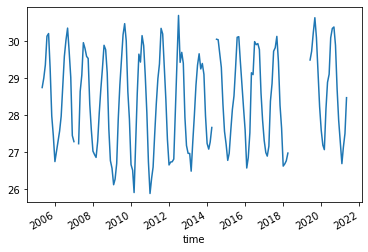

In [41]:
# Show me a simple plot
rdf['wtmp'].plot()